In [ ]:
#trans.serveirc.com/csv/AB_NYC_2019.csv

In [ ]:
import urllib.request

In [ ]:
def downloadurl(url_str, path):
    long_url = urllib.request.urlopen(url_str).geturl()
    urllib.request.urlretrieve(long_url, path)

downloadurl('http://trans.serveirc.com/csv/AB_NYC_2019.csv', "nyc.csv")

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas.api.types import CategoricalDtype

In [ ]:
df = pd.read_csv("./nyc.csv", dtype={"neighbourhood_group": CategoricalDtype(), "room_type": CategoricalDtype()})
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   id                              48895 non-null  int64   
 1   name                            48879 non-null  object  
 2   host_id                         48895 non-null  int64   
 3   host_name                       48874 non-null  object  
 4   neighbourhood_group             48895 non-null  category
 5   neighbourhood                   48895 non-null  object  
 6   latitude                        48895 non-null  float64 
 7   longitude                       48895 non-null  float64 
 8   room_type                       48895 non-null  category
 9   price                           48895 non-null  int64   
 10  minimum_nights                  48895 non-null  int64   
 11  number_of_reviews               48895 non-null  int64   
 12  last_review       

In [ ]:
df.drop(['id', 'host_id', 'host_name'], axis=1, inplace=True)

In [ ]:
df.fillna({"reviews_per_month":0, "name":0, "last_review":0}, inplace=True)
df.isnull().sum()

name                              0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [ ]:
df.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,40.728949,-73.952170,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,0.054530,0.046157,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [ ]:
print(f"{df['neighbourhood_group'].unique()}\n")
print(f"{df['room_type'].unique()}")

['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx']
Categories (5, object): ['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island']

['Private room', 'Entire home/apt', 'Shared room']
Categories (3, object): ['Entire home/apt', 'Private room', 'Shared room']


In [ ]:
sns.set(style='whitegrid', palette='dark', font_scale=0.9, rc={"figure.figsize": (6, 4)})

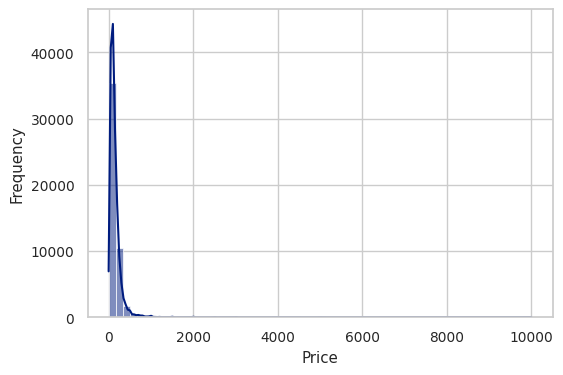

In [ ]:
sns.histplot(data=df, x="price", kde=True, bins=60) #bins=auto
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

Text(0.5, 1.0, 'Frequency of Room Types')

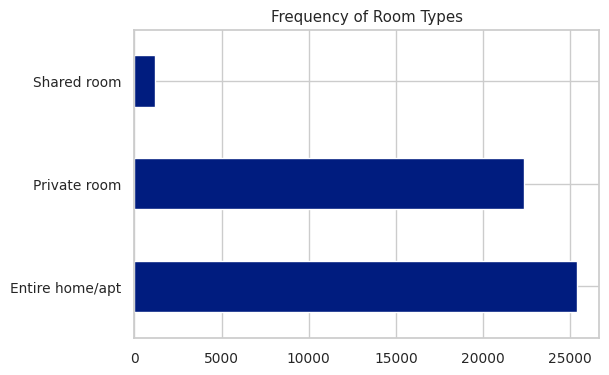

In [ ]:
df['room_type'].value_counts().plot.barh().set_title("Frequency of Room Types")

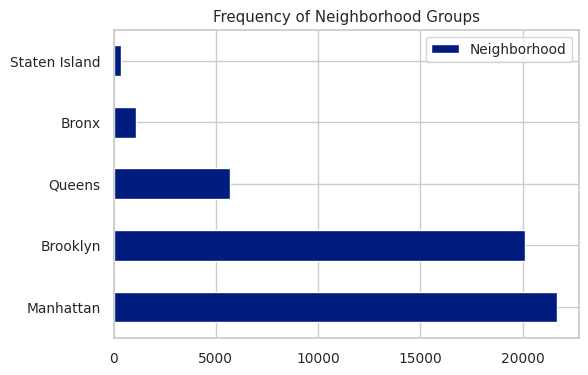

In [ ]:
df['neighbourhood_group'].value_counts().plot.barh().set_title("Frequency of Neighborhood Groups")
plt.legend(['Neighborhood'])

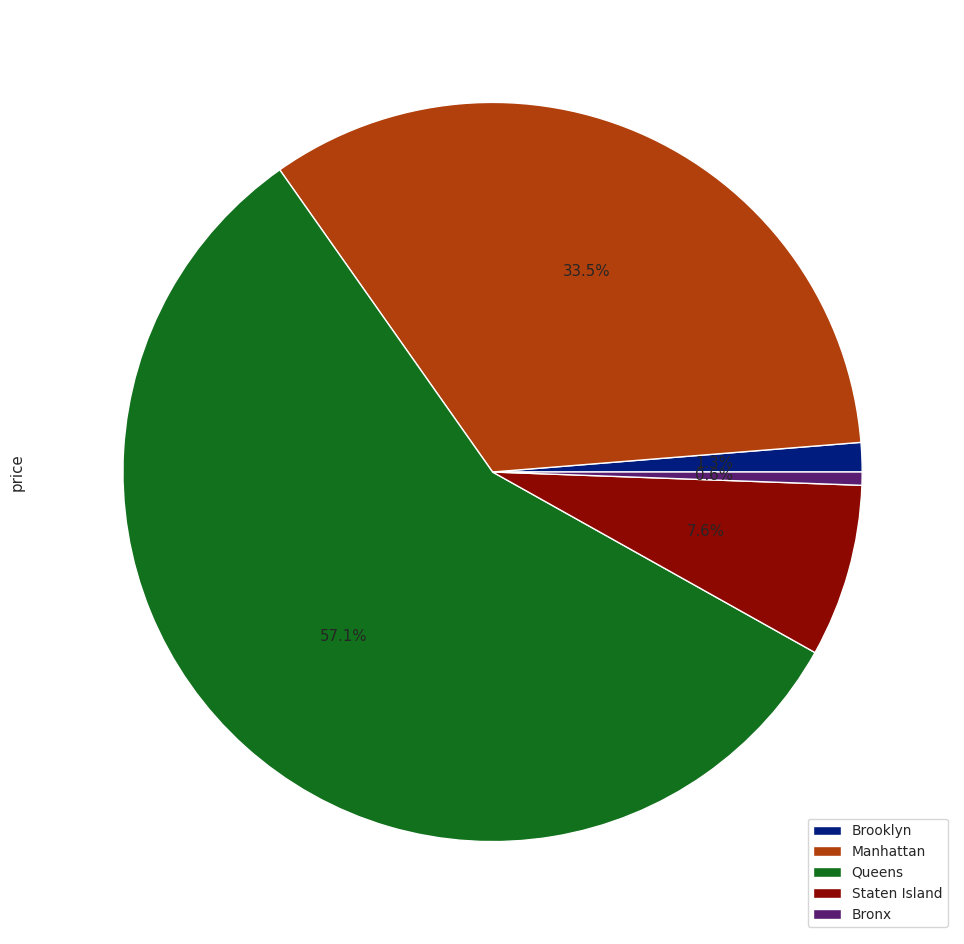

In [ ]:
df.groupby("neighbourhood_group").sum(numeric_only=True).plot.pie(y="price", autopct="%.1f%%", labels=None, figsize=(12,12))
plt.legend(df["neighbourhood_group"].unique(), loc="lower right")

Text(0.5, 1.0, 'Average Price by Neighborhood')

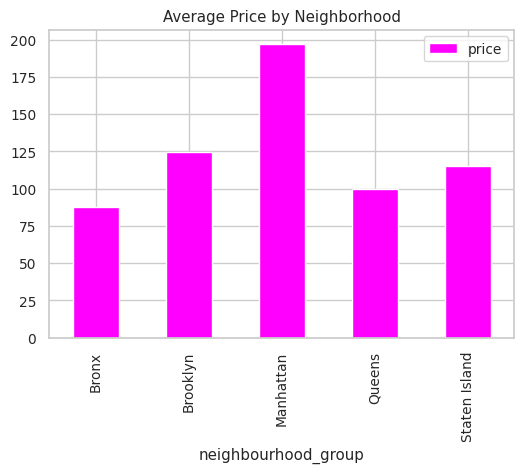

In [ ]:
df.groupby('neighbourhood_group').agg({'price':'mean'}).plot.bar(alpha=1,color='magenta').set_title("Average Price by Neighborhood")

Text(0.5, 1.0, 'Average Price by Neighborhood')

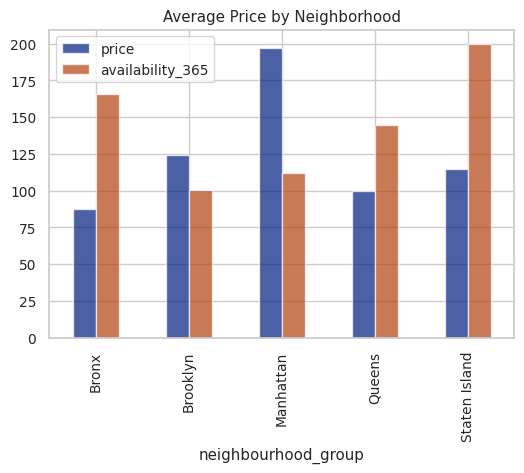

In [ ]:
df.groupby('neighbourhood_group').agg({'price':'mean','availability_365':'mean'}).plot.bar(alpha=0.7).set_title("Average Price by Neighborhood")

In [ ]:
dF = df.groupby(by=['neighbourhood_group', 'room_type']).agg({'price':'mean'})
dF.reset_index(inplace=True)
dF

,neighbourhood_group,room_type,price
0,Bronx,Entire home/apt,127.506596
1,Bronx,Private room,66.788344
2,Bronx,Shared room,59.800000
3,Brooklyn,Entire home/apt,178.327545
4,Brooklyn,Private room,76.500099
5,Brooklyn,Shared room,50.527845
6,Manhattan,Entire home/apt,249.239109
7,Manhattan,Private room,116.776622
8,Manhattan,Shared room,88.977083
9,Queens,Entire home/apt,147.050573


Text(0.5, 1.0, 'Neighborhood - Price - Room type')

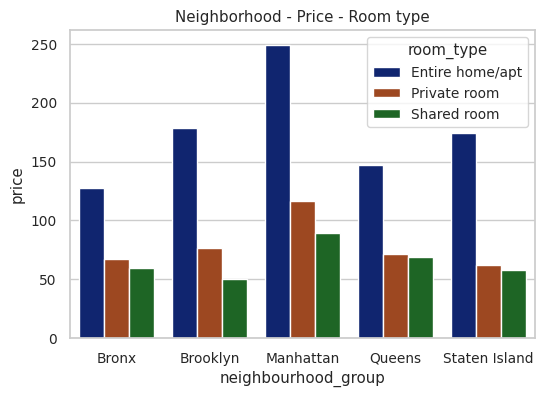

In [ ]:
sns.barplot(data=dF, x="neighbourhood_group",y="price",hue="room_type")
plt.title("Neighborhood - Price - Room type")

Text(0.5, 1.0, 'Neighborhood - Price')

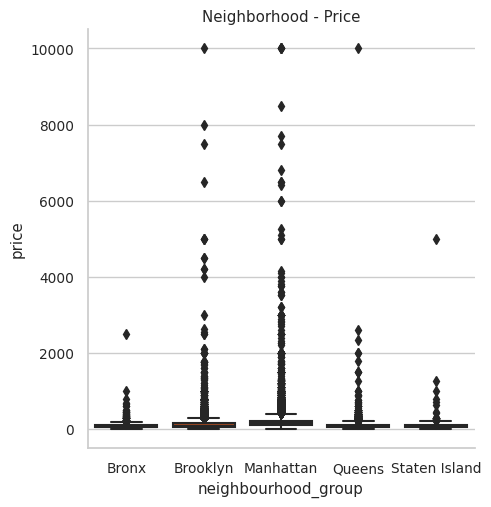

In [ ]:
sns.catplot(data=df, x="neighbourhood_group", y="price", kind="box")
plt.title("Neighborhood - Price")

Text(0.5, 1.0, 'Average Price by Neighborhood and Room Type')

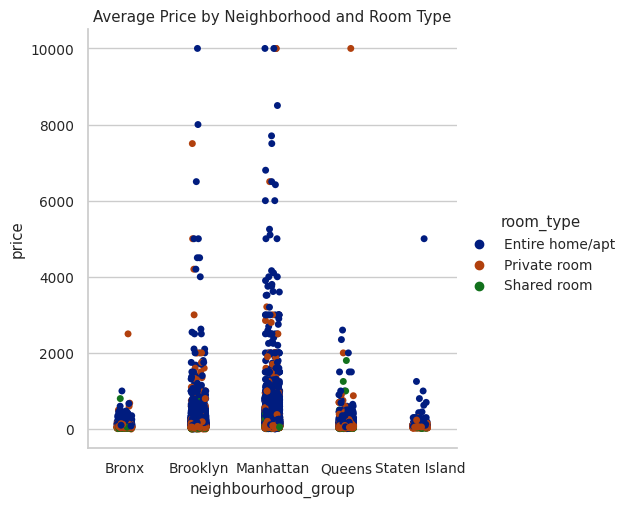

In [ ]:
sns.catplot(data=df, x="neighbourhood_group", y="price", kind='strip', hue="room_type")
plt.title("Average Price by Neighborhood and Room Type")

Text(0.5, 1.0, 'Average Price by Neighborhood and Room Type')

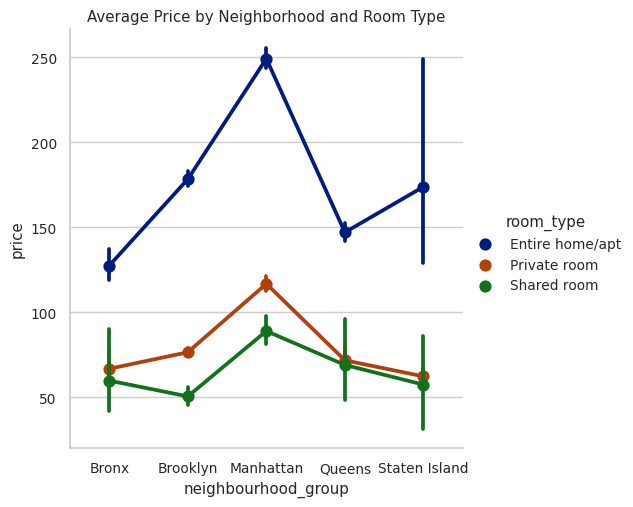

In [ ]:
sns.catplot(data=df, x="neighbourhood_group", y="price", hue="room_type", kind="point", join=True)
plt.title("Average Price by Neighborhood and Room Type")

In [ ]:
df['availability_365'].value_counts()

0      17533
365     1295
364      491
1        408
89       361
       ...  
195       26
183       24
196       24
181       23
202       20
Name: availability_365, Length: 366, dtype: int64

Text(0.5, 1.0, 'Density Plot by Neighborhood Group and Price')

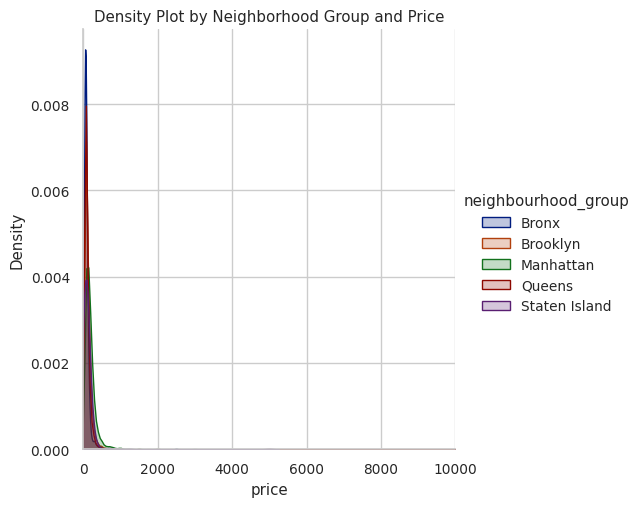

In [ ]:
g = sns.FacetGrid(df, hue="neighbourhood_group", height=5, xlim=(0, 10000))
g.map(sns.kdeplot, "price", fill=True)
g.add_legend()
plt.title("Density Plot by Neighborhood Group and Price")

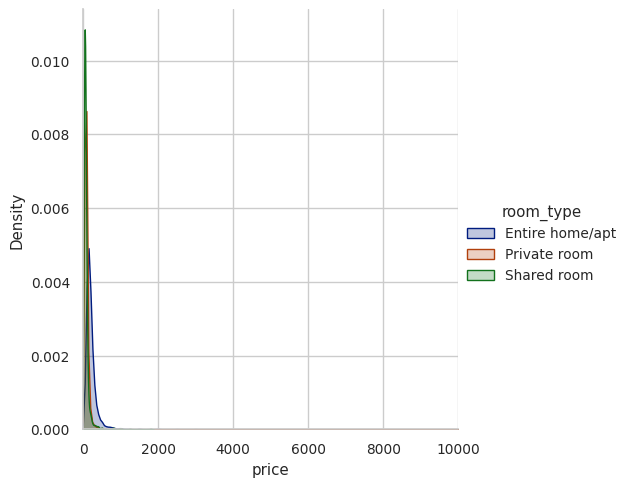

In [ ]:
sns.FacetGrid(df, hue="room_type", height=5, xlim=(0, df['price'].max())).map(sns.kdeplot, "price", fill=True).add_legend()

<ipython-input-46-1a1b31be5ebf>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


Text(0.5, 1.0, 'Correlation Heatmap')

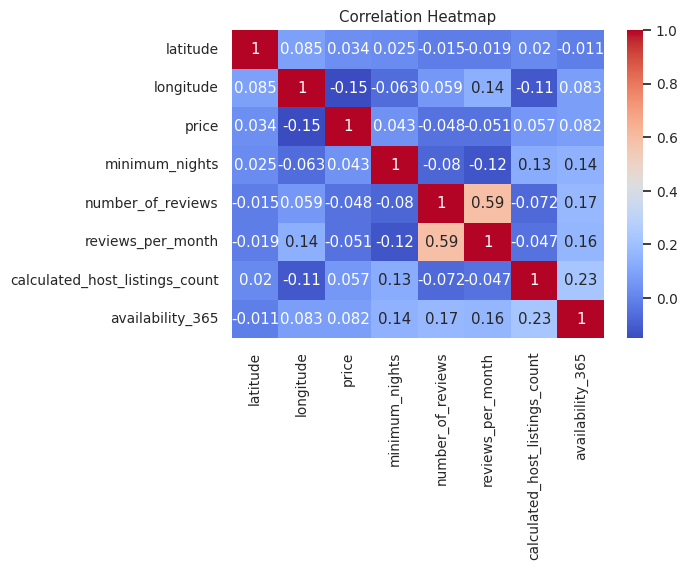

In [ ]:
plt.title("Correlation Heatmap")
corr = df.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
